# Unit 5 - Financial Planning


In [18]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [19]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [20]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [21]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [22]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [23]:
my_eth_response = requests.get(eth_url)
my_btc_response = requests.get(btc_url)
# Compute current value of my crpto

my_btc_json = my_btc_response.json()
my_eth_json = my_eth_response.json()

# Fetch current BTC price

my_btc_price = my_btc_json['data']['1']['quotes']['USD']['price']

# Fetch current ETH price

my_eth_price = my_eth_json['data']['1027']['quotes']['USD']['price']

my_btc_value = my_btc * my_btc_price
my_eth_value = my_eth * my_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc_price} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth_price} ETH is ${my_eth_value:0.2f}")

The current value of your 11413.69 BTC is $13696.43
The current value of your 384.9 ETH is $2039.97


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [24]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [25]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [26]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-24", tz="America/Chicago").isoformat()

# # Set the tickers
tickers = ["AGG", "SPY"]

# # Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# # Get current closing prices for SPY and AGG
tickers_info_df = alpaca.get_barset(tickers, timeframe, start= today).df


spy_close_price = tickers_info_df["SPY"]["close"][0]
agg_close_price = tickers_info_df["AGG"]["close"][0]
agg_close_price


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.62
Current SPY closing price: $342.94


In [27]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17147.00
The current value of your 200 AGG shares is $23724.00


### Savings Health Analysis

In [28]:
# Create savings DataFrame
crypto_total = my_btc_value + my_eth_value
shares_total = my_spy_value + my_agg_value

data = {'Amount':[crypto_total, shares_total]}
df_savings = pd.DataFrame(data, index = ['Crypto', 'Stock'])
df_savings
# Create DataFrame 
# df = pd.DataFrame(data) 
  
# # Print the output. 
# df 

# Display savings DataFrame
#display(df_savings)

,Amount
Crypto,15736.398
Stock,40871.000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A0B1F9EE48>],
      dtype=object)

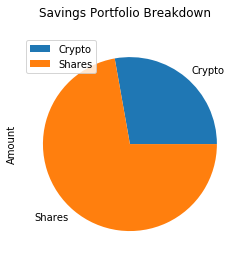

In [29]:
# Plot savings pie chart
my_labels = 'Crypto','Shares'
df_savings.plot.pie(title = "Savings Portfolio Breakdown", labels=my_labels,subplots=True)


In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)
# Calculate total amount of savings
total_savings = crypto_total + shares_total
print(total_savings)
# Validate saving health
if total_savings > emergency_fund:
    print("You're Prepared")
else:
    print("You NEED to Save")


36000
56607.398
You're Prepared


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [32]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
timeframe = "1D"
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [33]:
# Get 5 years' worth of historical data for SPY and AGG
tickers= ["AGG", "SPY"]
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
df_ticker.tail()


AGG                                       \
                             open    high       low    close    volume   
2020-08-03 00:00:00-04:00  119.37  119.40  119.1903  119.400  24615464   
2020-08-04 00:00:00-04:00  119.42  119.63  119.4200  119.630  21512268   
2020-08-05 00:00:00-04:00  119.39  119.49  119.3100  119.400  34239733   
2020-08-06 00:00:00-04:00  119.62  119.73  119.5300  119.580   9021388   
2020-08-07 00:00:00-04:00  119.66  119.73  119.3950  119.445   8830420   

                                SPY                                    
                               open    high     low   close    volume  
2020-08-03 00:00:00-04:00  328.3200  329.62  327.73  328.76  89861354  
2020-08-04 00:00:00-04:00  327.8600  330.06  327.86  330.03  73684427  
2020-08-05 00:00:00-04:00  331.4700  332.39  331.18  332.06  72941562  
2020-08-06 00:00:00-04:00  331.4799  334.46  331.13  334.31  76988181  
2020-08-07 00:00:00-04:00  333.2800  334.88  332.30  334.55  98710236

In [34]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [35]:
# Printing the simulation input data
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30)
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.980499,1.002558,1.009807,1.011231,0.996879,0.994478,1.004296,1.002061,1.005950,1.001572,...,1.004528,1.013133,0.998374,0.999300,0.995074,1.007595,1.000440,0.996025,0.989202,0.990935
2,0.989182,1.003866,0.997873,1.016898,0.998388,0.994228,1.004651,1.012840,0.997356,0.992691,...,1.014827,1.017870,0.994128,0.994144,0.998696,1.000586,1.007717,1.008884,0.974202,0.990156
3,0.989997,1.011438,1.002839,1.023793,1.002562,1.000626,1.002250,1.017912,1.001924,0.990594,...,1.018360,0.998944,0.996359,0.990574,0.999466,0.997245,1.009943,1.006348,0.983578,0.979412
4,0.983861,0.996813,1.003776,1.034256,1.006230,0.991506,1.003541,1.023945,0.996564,0.973329,...,1.023932,0.998458,0.994393,0.996472,1.005149,0.984695,0.998771,1.008000,0.964527,0.982502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.814641,18.555463,6.825491,8.243349,4.179504,2.957046,37.670196,18.177949,14.483912,3.572243,...,7.403304,14.331542,1.518869,9.493678,30.082468,6.844032,5.473909,7.171613,10.629925,9.097481
7557,2.819868,18.755401,6.801879,8.210188,4.124539,2.944875,37.729388,18.162343,14.328514,3.508395,...,7.481220,14.283607,1.502893,9.473834,29.955239,6.874829,5.445908,7.229213,10.718329,9.061822
7558,2.790083,18.852451,6.751925,8.179365,4.125330,2.933510,37.691697,18.278427,14.285863,3.503039,...,7.386034,14.391951,1.512329,9.411602,29.977713,6.794830,5.467962,7.234433,10.647178,9.047067
7559,2.807628,18.853880,6.805146,8.132721,4.137650,2.929883,37.736908,18.276649,14.277461,3.507677,...,7.314555,14.410465,1.510052,9.436751,30.187617,6.825108,5.498232,7.133128,10.621898,9.002212


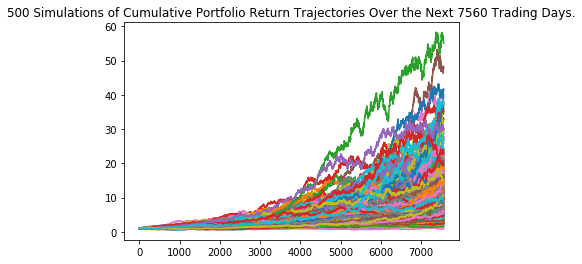

In [37]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

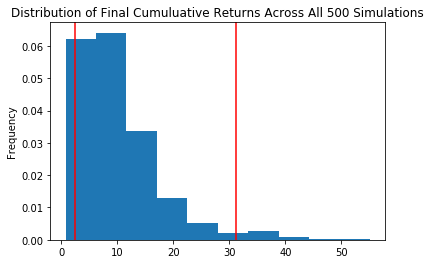

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             10.256342
std               7.415067
min               0.775454
25%               5.142865
50%               8.232705
75%              12.796491
max              55.080469
95% CI Lower      2.535941
95% CI Upper     31.202543
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $50718.82 and $624050.85


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [42]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $76078.24 and $936076.28


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_five)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

In [ ]:
# Plot probability distribution and confidence intervals


# Save the plot for future usage


In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results


# Print summary statistics


In [ ]:
# Set initial investment



# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")